In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/HEK(precursor_swap)/TPRP_EXPAND_NEW_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.00004.00004.2,1,SAEDVSTVPTQPDNPFSHPDK/2,0.165,0.018,[2],0,0.005,43,0.052,...,-1,0,0,(),Normal,Unk,Unk,0,1457974977,NaN
1,b1906_293T_proteinID_01A_QE3_122212.00009.00009.2,1,HVEEGSWYIQSLC[160]NHLK/2,0.140,0.006,[2],0,0.501,91,0.047,...,-1,0,0,(),Normal,Unk,Unk,0,1394513336,NaN
2,b1906_293T_proteinID_01A_QE3_122212.00011.00011.2,1,DTQEPNLSETFNNNEIEK/2,0.127,0.049,[2],0,0.505,60,0.033,...,-1,0,0,(),Normal,Unk,Unk,0,1292084517,NaN
3,b1906_293T_proteinID_01A_QE3_122212.00013.00013.3,1,DLEDGEVPQHAGK/3,0.318,0.044,[3],0,0.329,332,0.072,...,-1,0,0,(),Normal,Unk,Unk,0,69196226,NaN
4,b1906_293T_proteinID_01A_QE3_122212.00016.00016.3,1,NFC[160]SAVQYGNAQIIEC[160]LKENK/3,0.204,0.011,[2],0,-0.002,105,0.076,...,-1,0,0,(),Normal,Unk,Unk,0,345113761,NaN


In [3]:
NNd1 = pd.read_excel('./target_decoy/HEK(precursor_swap)/TPRP_EXPAND_NEW_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.00001.00001.3,1,QGDSEQLDPAR/3,0.415,0.103,[2],0,-0.00666,241,0.0751,...,-1,0,0,(),Normal,Unk,Unk,1,XXX_,4107552043
1,b1906_293T_proteinID_01A_QE3_122212.00002.00002.3,1,IMSETSMR/3,0.238,0.006,[2],0,0.33400,357,0.0680,...,-1,0,0,(),Normal,Unk,Unk,1,XXX_,3859938479
2,b1906_293T_proteinID_01A_QE3_122212.00003.00003.2,1,ILPLFSR/2,0.239,0.033,[2],0,-0.00300,251,0.0630,...,-1,0,0,(),Normal,Unk,Unk,1,XXX_,3678982563
3,b1906_293T_proteinID_01A_QE3_122212.00006.00006.2,1,GSNSHDEFNVAHELIC[160]K/2,0.214,0.028,[2],0,0.49800,56,0.0590,...,-1,0,0,(),Normal,Unk,Unk,1,XXX_,3493711968
4,b1906_293T_proteinID_01A_QE3_122212.00007.00007.4,1,LLNVIQPHLDGIK/4,0.332,0.061,[2],0,0.24900,78,0.1080,...,-1,0,0,(),Normal,Unk,Unk,1,XXX_,4621284458


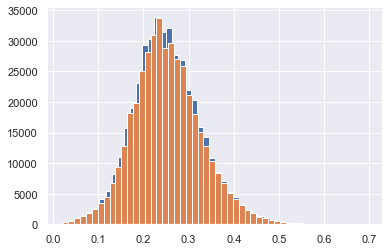

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.01346
0.013000000000000001


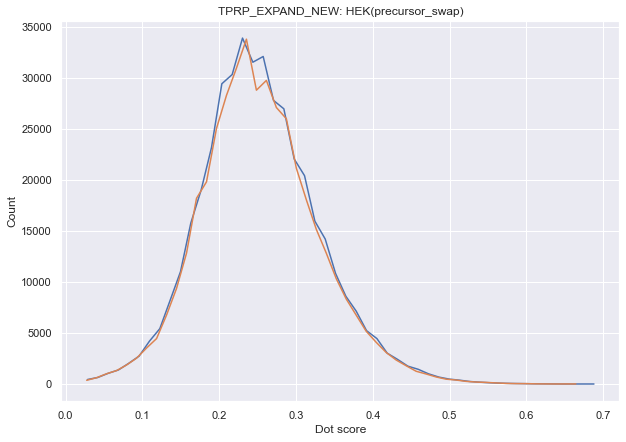

In [8]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('TPRP_EXPAND_NEW: HEK(precursor_swap)')
plt.plot(nnt1[1][:-1] + 0.0065, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.0065, nnd1[0])
plt.show()

In [6]:
print(len(NNt1))
print(len(NNd1))

427502
425657


In [7]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
"""

score:  0.001
nnt:  427502
nnd:  425657
FDR:  0.9956842307170493


score:  0.002
nnt:  427502
nnd:  425657
FDR:  0.9956842307170493


score:  0.003
nnt:  427502
nnd:  425657
FDR:  0.9956842307170493


score:  0.004
nnt:  427502
nnd:  425657
FDR:  0.9956842307170493


score:  0.005
nnt:  427502
nnd:  425657
FDR:  0.9956842307170493


score:  0.006
nnt:  427502
nnd:  425657
FDR:  0.9956842307170493


score:  0.007
nnt:  427502
nnd:  425657
FDR:  0.9956842307170493


score:  0.008
nnt:  427502
nnd:  425657
FDR:  0.9956842307170493


score:  0.009000000000000001
nnt:  427502
nnd:  425657
FDR:  0.9956842307170493


score:  0.010000000000000002
nnt:  427502
nnd:  425657
FDR:  0.9956842307170493


score:  0.011000000000000003
nnt:  427502
nnd:  425657
FDR:  0.9956842307170493


score:  0.012000000000000004
nnt:  427502
nnd:  425657
FDR:  0.9956842307170493


score:  0.013000000000000005
nnt:  427502
nnd:  425657
FDR:  0.9956842307170493


score:  0.014000000000000005
nnt:  427502
nnd:  425657

nnt:  419002
nnd:  417016
FDR:  0.9952601658225975


score:  0.10400000000000008
nnt:  418711
nnd:  416758
FDR:  0.9953356849951398


score:  0.10500000000000008
nnt:  418445
nnd:  416488
FDR:  0.9953231607499193


score:  0.10600000000000008
nnt:  418180
nnd:  416222
FDR:  0.9953178057295902


score:  0.10700000000000008
nnt:  417894
nnd:  415933
FDR:  0.9953074224564123


score:  0.10800000000000008
nnt:  417596
nnd:  415636
FDR:  0.9953064684527629


score:  0.10900000000000008
nnt:  417324
nnd:  415331
FDR:  0.9952243340905388


score:  0.11000000000000008
nnt:  417013
nnd:  415056
FDR:  0.9953071007378667


score:  0.11100000000000008
nnt:  416692
nnd:  414760
FDR:  0.9953634819003004


score:  0.11200000000000009
nnt:  416367
nnd:  414435
FDR:  0.9953598628133353


score:  0.11300000000000009
nnt:  416032
nnd:  414099
FDR:  0.9953537227905546


score:  0.11400000000000009
nnt:  415720
nnd:  413769
FDR:  0.9953069373616857


score:  0.11500000000000009
nnt:  415399
nnd:  413452
FD

nnt:  314134
nnd:  311799
FDR:  0.992566866369129


score:  0.20600000000000016
nnt:  311998
nnd:  309756
FDR:  0.9928140565003621


score:  0.20700000000000016
nnt:  309779
nnd:  307690
FDR:  0.9932564828474493


score:  0.20800000000000016
nnt:  307640
nnd:  305479
FDR:  0.9929755558444936


score:  0.20900000000000016
nnt:  305360
nnd:  303329
FDR:  0.9933488341629552


score:  0.21000000000000016
nnt:  303126
nnd:  301152
FDR:  0.9934878565349062


score:  0.21100000000000016
nnt:  300790
nnd:  298967
FDR:  0.9939392931945876


score:  0.21200000000000016
nnt:  298521
nnd:  296683
FDR:  0.9938429792208924


score:  0.21300000000000016
nnt:  296271
nnd:  294424
FDR:  0.9937658427588255


score:  0.21400000000000016
nnt:  294040
nnd:  292113
FDR:  0.9934464698680452


score:  0.21500000000000016
nnt:  291698
nnd:  289822
FDR:  0.9935686909063484


score:  0.21600000000000016
nnt:  289396
nnd:  287529
FDR:  0.9935486323238746


score:  0.21700000000000016
nnt:  287058
nnd:  285228
FDR

nnt:  89436
nnd:  88112
FDR:  0.9851961178943602


score:  0.3110000000000002
nnt:  88022
nnd:  86702
FDR:  0.9850037490627344


score:  0.3120000000000002
nnt:  86605
nnd:  85240
FDR:  0.9842387852895329


score:  0.3130000000000002
nnt:  85142
nnd:  83840
FDR:  0.9847078997439571


score:  0.3140000000000002
nnt:  83695
nnd:  82432
FDR:  0.9849094928012426


score:  0.3150000000000002
nnt:  82270
nnd:  81040
FDR:  0.9850492281512094


score:  0.3160000000000002
nnt:  80918
nnd:  79740
FDR:  0.9854420524481574


score:  0.3170000000000002
nnt:  79520
nnd:  78370
FDR:  0.9855382293762576


score:  0.3180000000000002
nnt:  78256
nnd:  77109
FDR:  0.9853429768963402


score:  0.31900000000000023
nnt:  76914
nnd:  75743
FDR:  0.9847752034740099


score:  0.32000000000000023
nnt:  75560
nnd:  74443
FDR:  0.9852170460561144


score:  0.32100000000000023
nnt:  74318
nnd:  73129
FDR:  0.9840011841007562


score:  0.32200000000000023
nnt:  73003
nnd:  71860
FDR:  0.9843431091872936


score:  0

nnt:  9295
nnd:  9030
FDR:  0.9714900484131254


score:  0.4240000000000003
nnt:  9077
nnd:  8803
FDR:  0.9698138151371598


score:  0.4250000000000003
nnt:  8881
nnd:  8598
FDR:  0.9681342191194685


score:  0.4260000000000003
nnt:  8684
nnd:  8401
FDR:  0.9674113311837863


score:  0.4270000000000003
nnt:  8488
nnd:  8224
FDR:  0.9688972667295005


score:  0.4280000000000003
nnt:  8294
nnd:  8048
FDR:  0.9703400048227634


score:  0.4290000000000003
nnt:  8128
nnd:  7857
FDR:  0.9666584645669292


score:  0.4300000000000003
nnt:  7938
nnd:  7668
FDR:  0.9659863945578231


score:  0.4310000000000003
nnt:  7756
nnd:  7496
FDR:  0.9664775657555441


score:  0.43200000000000033
nnt:  7600
nnd:  7309
FDR:  0.9617105263157895


score:  0.43300000000000033
nnt:  7420
nnd:  7135
FDR:  0.9615902964959568


score:  0.43400000000000033
nnt:  7251
nnd:  6973
FDR:  0.9616604606261205


score:  0.43500000000000033
nnt:  7094
nnd:  6810
FDR:  0.9599661685931773


score:  0.43600000000000033
nnt:  6

nnt:  506
nnd:  505
FDR:  0.9980237154150198


score:  0.5350000000000004
nnt:  497
nnd:  496
FDR:  0.9979879275653923


score:  0.5360000000000004
nnt:  482
nnd:  485
FDR:  1.0062240663900415


score:  0.5370000000000004
nnt:  465
nnd:  476
FDR:  1.0236559139784946


score:  0.5380000000000004
nnt:  455
nnd:  466
FDR:  1.024175824175824


score:  0.5390000000000004
nnt:  444
nnd:  453
FDR:  1.0202702702702702


score:  0.5400000000000004
nnt:  431
nnd:  438
FDR:  1.0162412993039442


score:  0.5410000000000004
nnt:  406
nnd:  426
FDR:  1.0492610837438423


score:  0.5420000000000004
nnt:  395
nnd:  410
FDR:  1.0379746835443038


score:  0.5430000000000004
nnt:  383
nnd:  395
FDR:  1.031331592689295


score:  0.5440000000000004
nnt:  370
nnd:  387
FDR:  1.045945945945946


score:  0.5450000000000004
nnt:  355
nnd:  375
FDR:  1.056338028169014


score:  0.5460000000000004
nnt:  347
nnd:  358
FDR:  1.031700288184438


score:  0.5470000000000004
nnt:  341
nnd:  352
FDR:  1.032258064516129

'\n결과\n'